#🏦 Lending Club Loan 💰

# Introduction
Using historical data on loans from Lendig Club - including information on whether or not the borrower defaulted (charge-off) - the main objective of this notebook will be to predict if a potential borrower is likely to pay back the loan.

#Our Goal
In this capstone project, You will going to work on LendingClub Dataset obtained from Kaggle and the goal is to try find a better prediction model to prevent investing on '"bad loans". To do that, First, going to implement some data engineering and preprocessing on LendingClub dataset to prepare data for analysis and modeling. Second, you need to apply explanatory data analysis (EDA) to investigate the features. At the end, you use preprocessed data on LendingClub loans labeled on whether or not the borrower defaulted (charged-off) to develop a model and predict whether or not a borrower will pay back their loan. This way in the future when we get a new potential customer who assigned with higher interest loan, we can assess whether or not they are likely to pay back the loan.




# Modelling

**Importing necessary packages**

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
print("Imports Successful")

Imports Successful


In [25]:
data = pd.read_csv('/content/drive/MyDrive/LendingClub/combinedByYasin.csv')
data.shape

(2072806, 6)

In [26]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-','_')
del data['unnamed:_0']
data.columns

Index(['amount_requested', 'risk_score', 'debt_to_income_ratio',
       'employment_length', 'target'],
      dtype='object')

**So our traning data and validation data is sucessfully seperated .Lets just quickly check the shape of our data**

In [27]:
df = data.copy()

X = df.loc[:, df.columns != 'target'].values
y = df.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape,X_test.shape)

(1658244, 4) (414562, 4)


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

# Creating a Neural Network Model

**Now we are ready to start our modelling phase. First, let's apply a train-test-split and scale data before training.**

**Building the model**

In [30]:
model1 = Sequential()
model1.add(Dense(units=78,activation='relu'))
model1.add(Dense(units=39,activation='relu'))
model1.add(Dense(units=19,activation='relu'))
model1.add(Dense(units=8,activation='relu'))
model1.add(Dense(units=4,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Our model is now initilised.Lets just begin to train our model and then save it for further use and we can use more epocs for better accuracy**

In [31]:
# model1.fit(x=X_train, 
#           y=y_train, 
#           epochs=40,
#           batch_size=32,
#           validation_data=(X_test, y_test), verbose=1)

model1.fit(x=X_train, 
          y=y_train, 
          epochs=15,
          batch_size=32,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
51821/51821 [==============================] - 140s 3ms/step - loss: 0.7936 - accuracy: 0.6440 - val_loss: 0.4407 - val_accuracy: 0.8409
Epoch 2/15
51821/51821 [==============================] - 136s 3ms/step - loss: 0.3411 - accuracy: 0.8612 - val_loss: 0.3325 - val_accuracy: 0.8704
Epoch 3/15
51821/51821 [==============================] - 136s 3ms/step - loss: 0.3290 - accuracy: 0.8677 - val_loss: 0.3126 - val_accuracy: 0.8793
Epoch 4/15
51821/51821 [==============================] - 135s 3ms/step - loss: 0.3176 - accuracy: 0.8741 - val_loss: 0.3081 - val_accuracy: 0.8772
Epoch 5/15
51821/51821 [==============================] - 135s 3ms/step - loss: 0.3159 - accuracy: 0.8750 - val_loss: 0.3039 - val_accuracy: 0.8822
Epoch 6/15
51821/51821 [==============================] - 134s 3ms/step - loss: 0.3150 - accuracy: 0.8755 - val_loss: 0.3002 - val_accuracy: 0.8828
Epoch 7/15
51821/51821 [==============================] - 134s 3ms/step - loss: 0.3119 - accuracy: 0.8773 - val_

**Above results can be more accurate changing the Learning rate and Batch size and Epoch of the model**

**Evulating Model1**

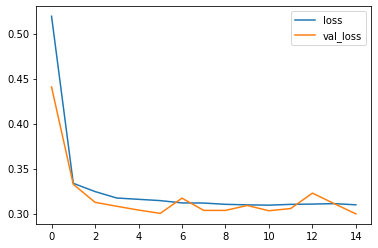

In [32]:
losses = pd.DataFrame(model1.history.history)
losses[['loss','val_loss']].plot()

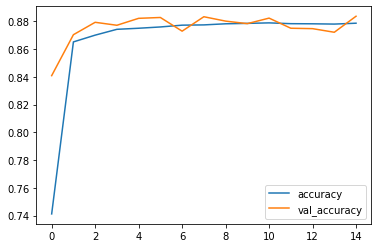

In [33]:
losses[['accuracy','val_accuracy']].plot()

In [34]:
predictions = (model1.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87    207499
           1       0.81      1.00      0.90    207063

    accuracy                           0.88    414562
   macro avg       0.90      0.88      0.88    414562
weighted avg       0.90      0.88      0.88    414562



In [35]:
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1
0,159753,47746
1,483,206580


**Saving Model**

In [36]:
!pip install pyyaml h5py 

In [37]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.4.1


In [38]:
model1.save('/content/drive/MyDrive/LendingClub/Saved Model/neural_network.h5') 

In [ ]:
#Loading Model
loaded_model1 = tf.keras.models.load_model('/content/drive/MyDrive/LendingClub/Saved Model/neural_network.h5')

In [39]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model1.predict(X_train)),
        'Test': roc_auc_score(y_test, model1.predict(X_test)),
    },
}

**Our Neural Network Model is now trained and saved for future purpose**


 # XGBoost Classifier

In [40]:
from xgboost import XGBClassifier

n_estimators = [50, 100, 200]
learning_rate = [0.05, 0.01, 0.5, 0.1, 1]
tree_method = ['gpu_hist']

params_grid = {
    'n_estimators': n_estimators,
#     'learning_rate': learning_rate,
}

xgb_clf = XGBClassifier()
xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
# xgb_cv.fit(X_train, y_train)
# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
print(f"Best Parameters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Best Parameters: {'n_estimators': 50, 'tree_method': 'gpu_hist'}
Train Result:
Accuracy Score: 88.78%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy     macro avg  weighted avg
precision       0.999966       0.816805  0.887819  9.083852e-01  9.083611e-01
recall          0.775605       0.999973  0.887819  8.877892e-01  8.878187e-01
f1-score        0.873610       0.899155  0.887819  8.863828e-01  8.863862e-01
support    828904.000000  829340.000000  0.887819  1.658244e+06  1.658244e+06
_______________________________________________
Confusion Matrix: 
 [[642902 186002]
 [    22 829318]]

Test Result:
Accuracy Score: 88.79%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg   weighted avg
precision       0.999994       0.816674  0.887877       0.908334       0.908430
recall          0.775994       0.999995  0.887877       0.887995  

**Lets visulize the info**

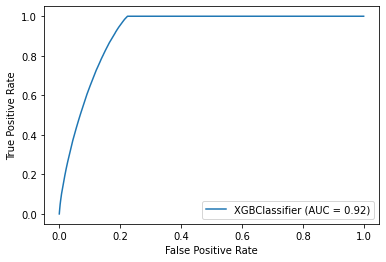

In [41]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_roc_curve(xgb_clf, X_test, y_test)

In [42]:
predictions = (xgb_clf.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87    207499
           1       0.82      1.00      0.90    207063

    accuracy                           0.89    414562
   macro avg       0.91      0.89      0.89    414562
weighted avg       0.91      0.89      0.89    414562



**Lets just put the data in our dictionary**

In [43]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

In [44]:
# Saving the model
xgb_clf.save_model('/content/drive/MyDrive/LendingClub/Saved Model/XGBoost.model')

In [45]:
#Loading the model
loaded_xgb = xgb.Booster({'nthread': 4})  # init model
loaded_xgb.load_model('/content/drive/MyDrive/LendingClub/Saved Model/XGBoost.model')  # load data

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.34%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy     macro avg  weighted avg
precision       0.997390       0.989382  0.993353  9.933862e-01  9.933851e-01
recall          0.989291       0.997412  0.993353  9.933515e-01  9.933526e-01
f1-score        0.993324       0.993381  0.993353  9.933525e-01  9.933525e-01
support    828904.000000  829340.000000  0.993353  1.658244e+06  1.658244e+06
_______________________________________________
Confusion Matrix: 
 [[820027   8877]
 [  2146 827194]]

Test Result:
Accuracy Score: 85.81%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg   weighted avg
precision       0.902100       0.822723  0.858123       0.862411       0.862453
recall          0.803773       0.912587  0.858123       0.858180       0.858123
f1-score        0.850102       0.865328  0.858123  

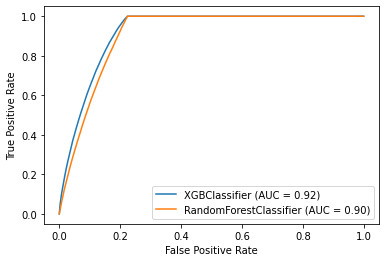

In [47]:
disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)

In [48]:
predictions = (rf_clf.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85    207499
           1       0.82      0.91      0.87    207063

    accuracy                           0.86    414562
   macro avg       0.86      0.86      0.86    414562
weighted avg       0.86      0.86      0.86    414562



**Lets put the scores in the dictionary for further reference**

In [49]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

In [50]:
import pickle
pickle.dump(rf_clf, open('/content/drive/MyDrive/LendingClub/Saved Model/RF.sav', 'wb'))

In [51]:
# Loading the model
loaded_rf_clf = pickle.load(open('/content/drive/MyDrive/LendingClub/Saved Model/RF.sav', 'rb'))

# Comparing Models Prerformance

In [52]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'ANNs': model1
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.858
XGBOOST                        roc_auc_score: 0.888
ANNS                           roc_auc_score: 0.887


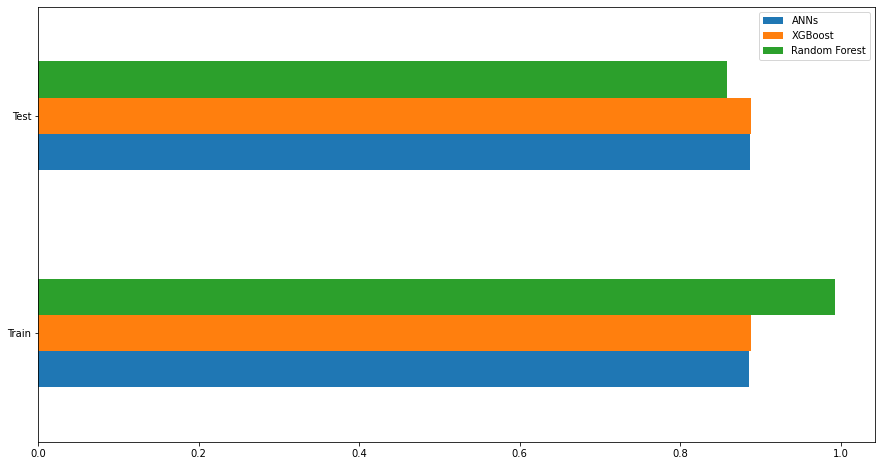

In [53]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))